## Подготовка

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Electronic_sales.csv')


## Задание 1

In [5]:
pref_payment = data.groupby('Customer ID')['Payment Method'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]
).reset_index()
pref_payment.columns = ['Customer ID', 'Preferred Payment Method']

customer_spending = data.groupby('Customer ID').agg(
    Total_Spending=('Total Price', 'sum'),
    Addon_Spending=('Add-on Total', 'sum')
).reset_index()

customer_summary = pd.merge(pref_payment, customer_spending, on='Customer ID')
print(customer_summary)

       Customer ID Preferred Payment Method  Total_Spending  Addon_Spending
0             1000              Credit Card         6279.42           66.30
1             1002                     Cash         5020.60           60.16
2             1003                     Cash           41.50           35.56
3             1004              Credit Card           83.00           65.78
4             1005               Debit Card        11779.11           75.33
...            ...                      ...             ...             ...
12131        19994            Bank Transfer         5504.87           93.17
12132        19995              Credit Card         5394.56            0.00
12133        19996            Bank Transfer        27296.78          432.12
12134        19997            Bank Transfer         2528.26          101.34
12135        19998            Bank Transfer          674.32            0.00

[12136 rows x 4 columns]


## Задание 2.1

In [7]:
shipping_revenue = data.groupby('Shipping Type')['Total Price'].sum().reset_index()

product_revenue = data.groupby('Product Type')['Total Price'].sum().reset_index()

data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
data['Month'] = data['Purchase Date'].dt.to_period('M')
data['Quarter'] = data['Purchase Date'].dt.to_period('Q')

monthly_addon = data.groupby('Month')['Add-on Total'].sum().reset_index()
monthly_addon['Month'] = monthly_addon['Month'].astype(str)

quarterly_addon = data.groupby('Quarter')['Add-on Total'].sum().reset_index()
quarterly_addon['Quarter'] = quarterly_addon['Quarter'].astype(str)

print("Доход по методу доставки:")
print(shipping_revenue)
print("\nДоход по типу продукта:")
print(product_revenue)
print("\nДоход от доп. услуг по месяцам:")
print(monthly_addon)
print("\nДоход от доп. услуг по кварталам:")
print(quarterly_addon)

Доход по методу доставки:
  Shipping Type  Total Price
0     Expedited  12437526.21
1       Express   8685215.62
2     Overnight   8704828.17
3      Same Day  12432024.82
4      Standard  21343073.55

Доход по типу продукта:
  Product Type  Total Price
0   Headphones   4041400.24
1       Laptop  12296239.97
2   Smartphone  21516754.69
3   Smartwatch  14036273.06
4       Tablet  11712000.41

Доход от доп. услуг по месяцам:
      Month  Add-on Total
0   2023-09       8012.62
1   2023-10      37837.12
2   2023-11      34888.81
3   2023-12      33509.15
4   2024-01     136195.16
5   2024-02     120148.92
6   2024-03     124954.26
7   2024-04     123973.59
8   2024-05     132018.51
9   2024-06     126689.59
10  2024-07     132017.20
11  2024-08     135133.14
12  2024-09      99518.89

Доход от доп. услуг по кварталам:
  Quarter  Add-on Total
0  2023Q3       8012.62
1  2023Q4     106235.08
2  2024Q1     381298.34
3  2024Q2     382681.69
4  2024Q3     366669.23


## Задание 2.2

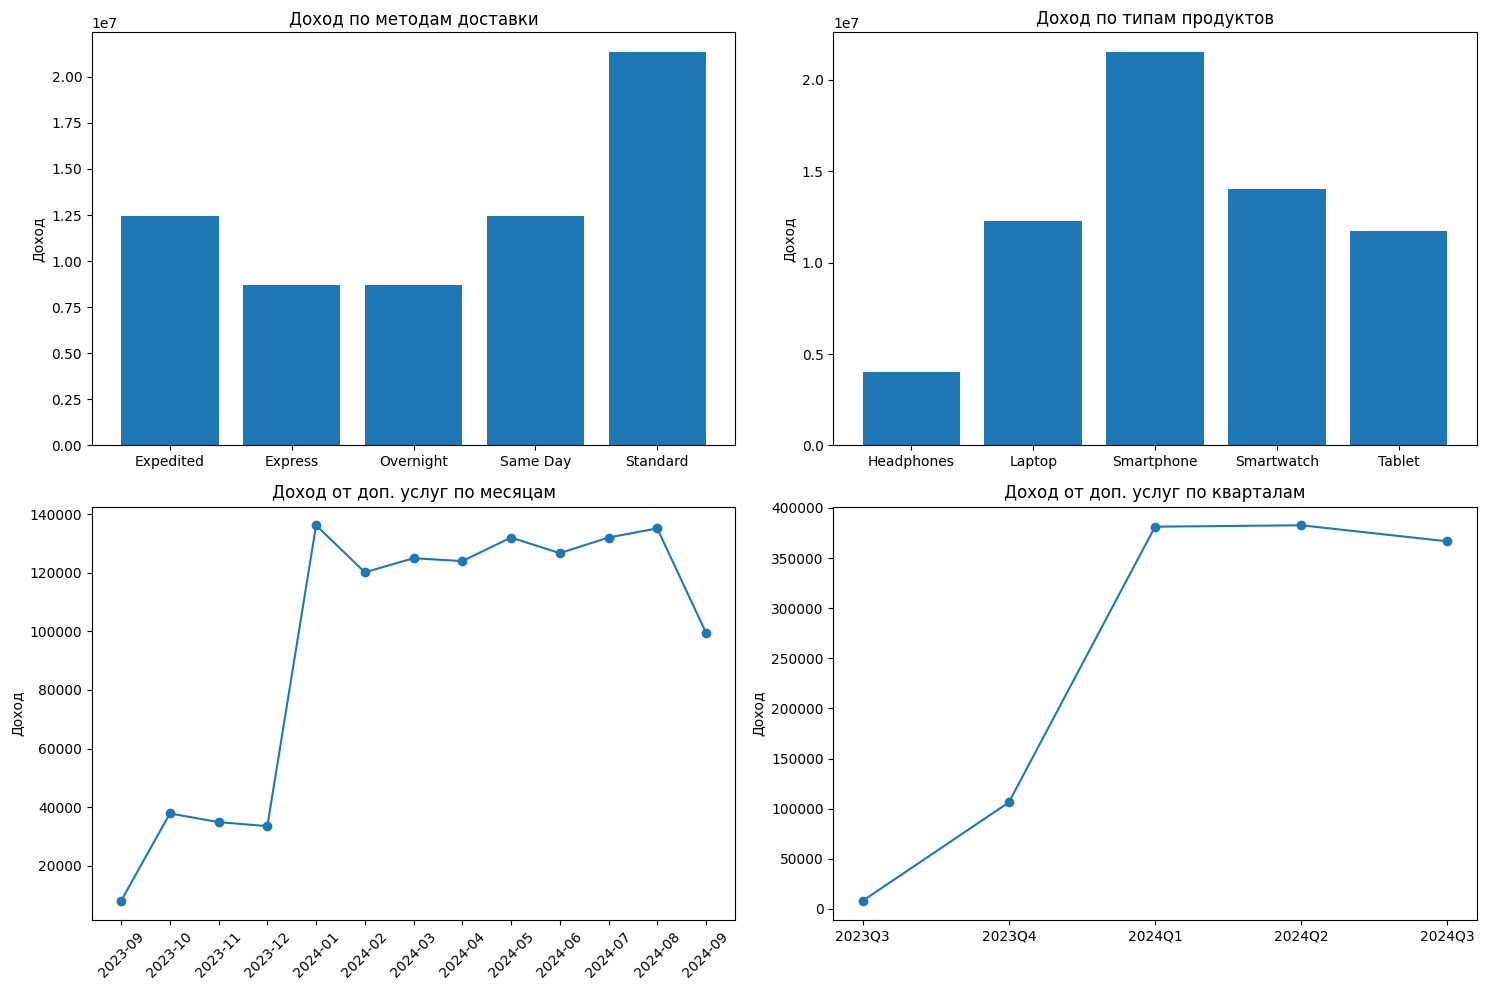

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].bar(shipping_revenue['Shipping Type'], shipping_revenue['Total Price'])
axes[0, 0].set_title('Доход по методам доставки')
axes[0, 0].set_ylabel('Доход')

axes[0, 1].bar(product_revenue['Product Type'], product_revenue['Total Price'])
axes[0, 1].set_title('Доход по типам продуктов')
axes[0, 1].set_ylabel('Доход')

axes[1, 0].plot(monthly_addon['Month'], monthly_addon['Add-on Total'], marker='o')
axes[1, 0].set_title('Доход от доп. услуг по месяцам')
axes[1, 0].set_ylabel('Доход')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)

axes[1, 1].plot(quarterly_addon['Quarter'], quarterly_addon['Add-on Total'], marker='o')
axes[1, 1].set_title('Доход от доп. услуг по кварталам')
axes[1, 1].set_ylabel('Доход')

plt.tight_layout()
plt.show()